## Review how to plot
To plot the classic data, we can use the `matplotlib` library. Here is an example code:

In [156]:
import matplotlib.pyplot as plt
import numpy as np

In [157]:
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows: 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示异常

In [158]:
# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

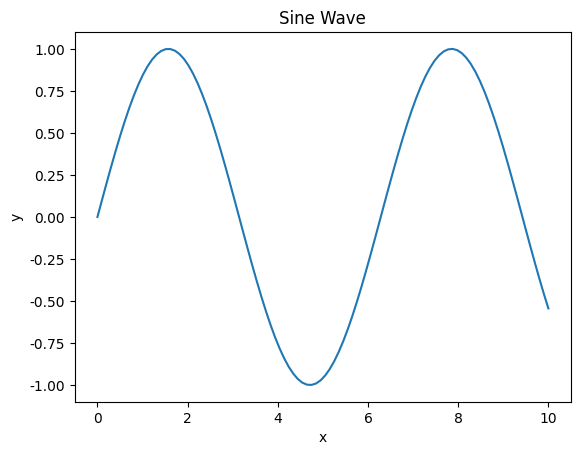

In [159]:
# Plot the data
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Wave')
plt.show()

In [160]:
from time import sleep
def acc(r,k=1,Z1=2,Z2=79,m=1):
    """
    计算加速度矢量
    :param r: 
    :param k: 
    :param Z1: 
    :param Z2: 
    :param m: 
    :return: 
    """
    x,y = r[0],r[1]
    r_abs = np.sqrt(x**2+y**2)
    return k * Z1 * Z2 *r /r_abs**3

In [161]:
# number of alpha particles
num_alpha = 15

In [162]:
# number of time steps
steps = 300

In [163]:
# time interval
dt=0.01

In [164]:
plt.figure()
from IPython.display import clear_output

<Figure size 640x480 with 0 Axes>

In [165]:
# for n in range(num_alpha):
#     history = np.zeros(shape=(steps, 2))
#     # alpha 粒子初始位置
#     x0 = -5
#     # alpha 粒子初始位置的y坐标，随机生成
#     y0 = np.random.uniform(-5, 5)
#     r = np.array([x0, y0])
#     # alpha 粒子初始速度
#     v = np.array([10, 0])
#     
#     for i in range(steps):
#         history[i] = r
#         # 使用速度 verlet 公式更新位置坐标和速度
#         a0 = acc(r)
#         r = r + v * dt + 0.5 * a0 * dt**2
#         a1 = acc(r)
#         v = v + 0.5 * (a0 + a1) * dt
#         # 画出横线，alpha 粒子，金原子核
#         plt.hlines(y=0, xmin=-10, xmax=10, linestyles='dashed')
#         plt.plot([0], [0], 'ro', ms=20)
#         plt.plot([r[0]], [r[1]], 'ko')
#         # 画出 alpha 粒子的历史轨迹
#         plt.plot(history[:i+1, 0], history[:i+1, 1], 'k-')
#         plt.xlim(-10, 10)  # 确定画布的 x 范围
#         plt.ylim(-10, 10)  # 确定画布的 y 范围
#         plt.xlabel("x")
#         plt.ylabel("y")
#         plt.show()
#         sleep(0.01)
#         clear_output()

接下来我们将用 `matplotlib` 绘制多个 α 粒子的轨迹，并用 `colormap` 为每个粒子分配颜色。
不再观看轨迹形成的动画，而是绘制出所有粒子的轨迹

粒子选用alpha粒子轰击金原子核的例子，可以更好地展示轨迹的变化。
势能场是有心力场，可以模拟粒子受到外力的影响。
也就是卢瑟福散射模型。

<Figure size 640x480 with 0 Axes>

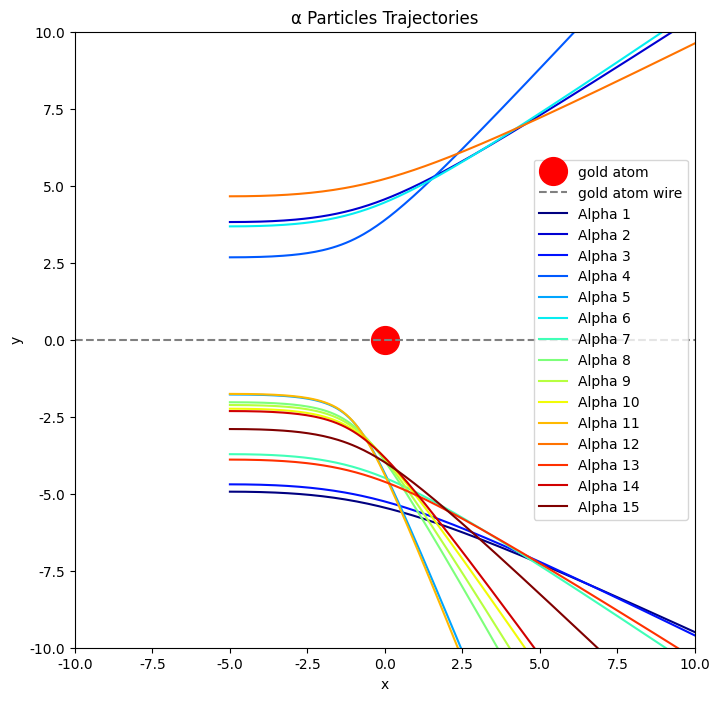

In [166]:
plt.clf()  # 清除当前 figure
# 利用 colormap 为每个粒子分配颜色
colors = plt.cm.jet(np.linspace(0, 1, num_alpha))
# 存储所有粒子的轨迹（每个轨迹是一个 shape=(steps,2) 的数组）
trajectories = []
for n in range(num_alpha):
    trajectory = np.zeros((steps, 2))  # 存储当前粒子轨迹
    # 初始位置：x 固定为 -5, y 随机在 [-5,5] 之间
    x0 = -5
    y0 = np.random.uniform(-5, 5)
    r = np.array([x0, y0])
    # 初始速度，沿 x 轴方向
    v = np.array([10, 0])
    
    for i in range(steps):
        trajectory[i] = r   # 保存当前时间步的位置
        
        # 计算当前位置的加速度
        a0 = acc(r)
        # 使用速度 Verlet 算法更新位置
        r = r + v * dt + 0.5 * a0 * dt**2
        # 计算更新后位置的加速度
        a1 = acc(r)
        # 更新速度
        v = v + 0.5 * (a0 + a1) * dt
        
    trajectories.append(trajectory)

# 绘图：将每个粒子的轨迹以不同颜色画在同一张图上
fig=plt.figure(figsize=(8,8))
# 绘制金原子核（假设位置为原点）和金箔线
plt.plot(0, 0, 'ro', ms=20, label="gold atom")
plt.axhline(0, color='gray', linestyle='--', label="gold atom wire")

# 循环绘制每个 α 粒子的轨迹
for n, trajectory in enumerate(trajectories):
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors[n],
             label=f'Alpha {n+1}')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("α Particles Trajectories")
# 保存图片到当前文件目录下
fig.savefig('./output/alpha_particles.png')
plt.show()





展示了二维后，考虑三维的情况，可以用 `matplotlib` 的 `mplot3d` 库来绘制三维图。

<Figure size 640x480 with 0 Axes>

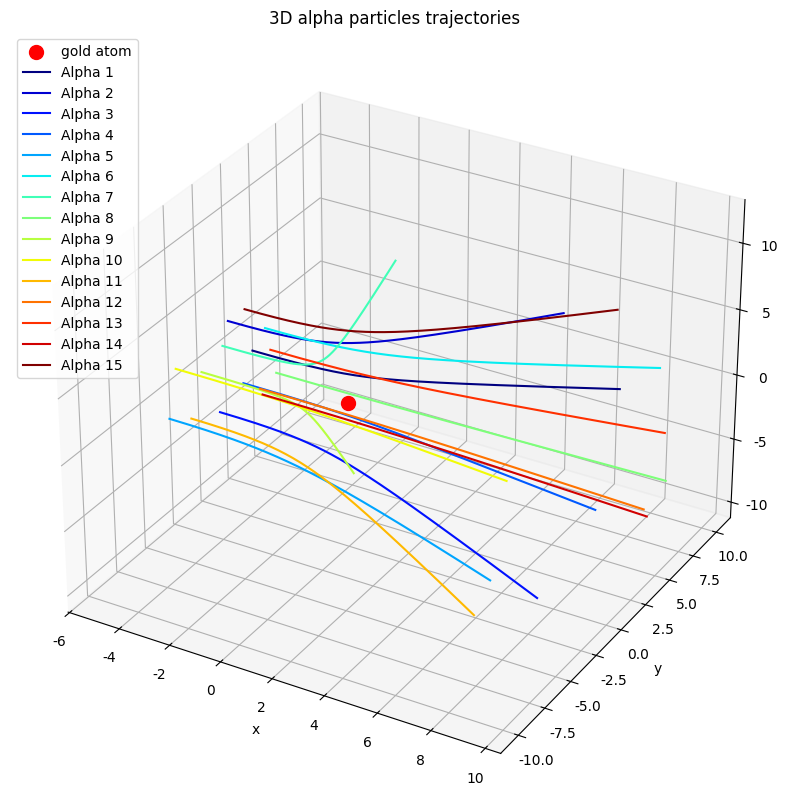

In [167]:
plt.clf()  # 清除当前 figure
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用于三维绘图

def acc(r, k=1, Z1=2, Z2=79, m=1):
    """
    根据三维位置矢量 r 计算加速度矢量，
    使用 np.linalg.norm 计算三维空间的距离。
    """
    r_abs = np.linalg.norm(r)
    return k * Z1 * Z2 * r / r_abs**3

# 模拟参数
num_alpha = 15  # α 粒子数量
steps = 150     # 时间步数
dt = 0.01       # 时间步长

# 利用 colormap 为每个粒子分配颜色
colors = plt.cm.jet(np.linspace(0, 1, num_alpha))

# 存储所有粒子的轨迹，每个轨迹的 shape 为 (steps, 3)
trajectories = []

# 对每个 α 粒子进行模拟
for n in range(num_alpha):
    trajectory = np.zeros((steps, 3))
    # 初始位置：x 固定为 -5，y 和 z 均随机在 [-5,5] 之间
    x0 = -5
    y0 = np.random.uniform(-5, 5)
    z0 = np.random.uniform(-5, 5)
    r = np.array([x0, y0, z0])
    # 初始速度，沿 x 轴方向
    v = np.array([10, 0, 0])
    
    for i in range(steps):
        trajectory[i] = r  # 记录当前位置
        
        # 计算当前位置的加速度
        a0 = acc(r)
        # 使用速度 Verlet 方法更新位置
        r = r + v * dt + 0.5 * a0 * dt**2
        # 计算更新后位置的加速度
        a1 = acc(r)
        # 更新速度
        v = v + 0.5 * (a0 + a1) * dt
    
    trajectories.append(trajectory)

# 三维绘图：将每个粒子的轨迹以不同颜色绘制在同一图中
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制金原子核（假设在原点）
ax.scatter(0, 0, 0, color='r', s=100, label="gold atom")

# 循环绘制每个 α 粒子的轨迹
for n, trajectory in enumerate(trajectories):
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2],
            color=colors[n], label=f'Alpha {n+1}')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D alpha particles trajectories")
ax.legend()
# 保存图片到当前文件目录下
fig.savefig('./output/alpha_particles_3d.png')
plt.show()


下面通过蒙特卡洛模拟来验证我们公式的正确性


<Figure size 640x480 with 0 Axes>

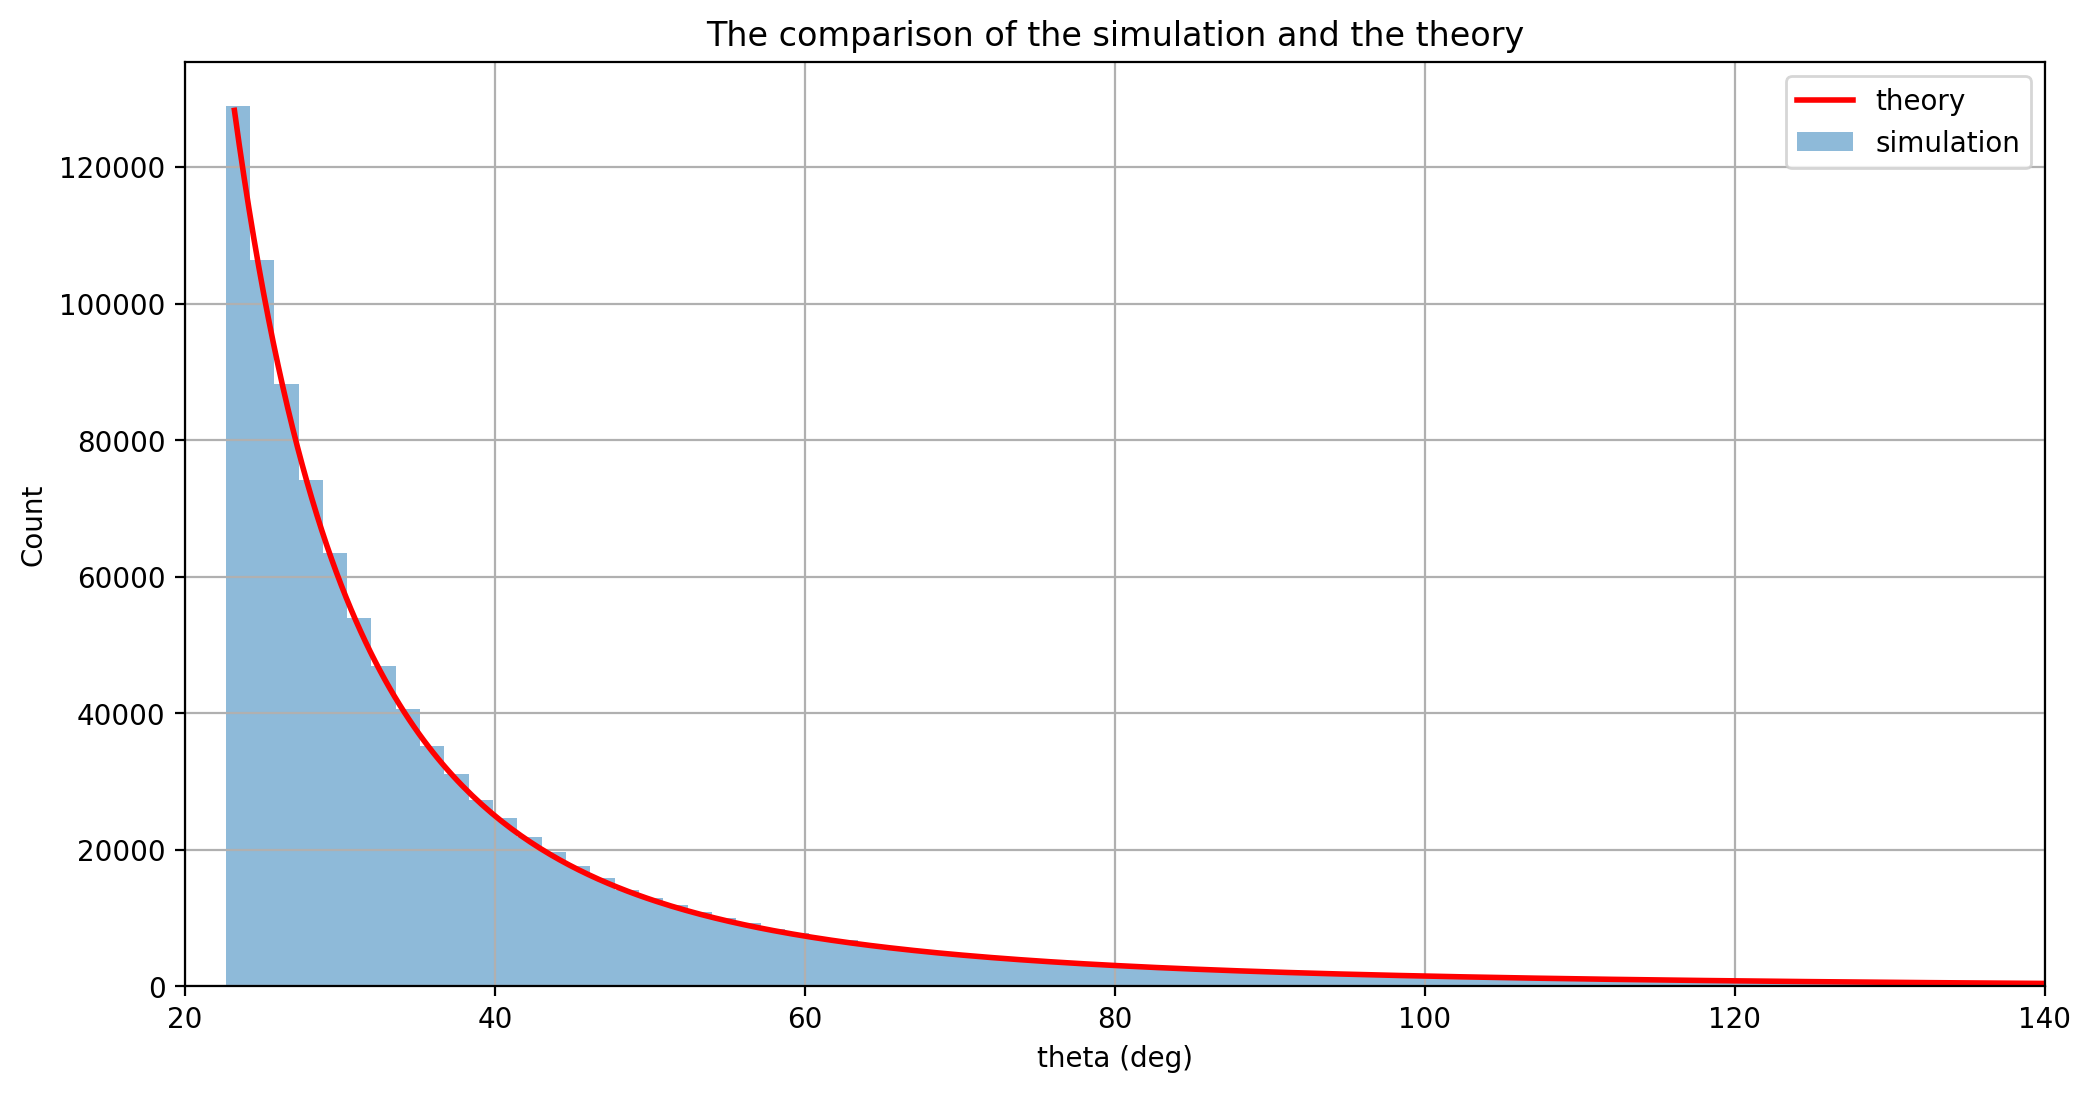

In [168]:
plt.clf()  # 清除当前 figure
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

# 1. 参数设定

e = 1.602e-19        
epsilon0 = 8.854e-12  
q = 2 * e             
Z = 79                
Q = Z * e             
E_MeV = 5.0
E = E_MeV * 1.602e-13  

C = q * Q / (8 * math.pi * epsilon0 * E)
b_max = 5 * C  
minmax = 59

# 2. 模拟发射粒子
N = 1000000  
u = np.random.uniform(0, 1, N)
b = b_max * np.sqrt(u)  
theta = 2 * np.arctan(C / b)  
theta_deg = np.degrees(theta)
# 3. 直方图
nbins = 100
hist_vals, bin_edges = np.histogram(theta_deg, bins=nbins, density=False)  # 关闭 density
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

fig=plt.figure(figsize=(12,6), dpi=200)
plt.bar(bin_centers, hist_vals, width=(bin_edges[1]-bin_edges[0]), alpha=0.5, label='simulation')

# 4. 理论曲线

theta_min = 2 * np.arctan(C / b_max)

K = (q * Q / (16 * math.pi * epsilon0 * E))**2
def P_theta(theta):
    return K * np.sin(theta) / (np.sin(theta/2)**4)

# 归一化因子
norm_const, _ = quad(P_theta, theta_min, math.pi)
P_theta_norm = lambda theta: P_theta(theta) / norm_const

theta_vals = np.linspace(theta_min + 0.01, math.pi - 0.01, 500)  
theta_vals_deg = np.degrees(theta_vals)

# 让理论曲线匹配直方图的尺度
P_vals = P_theta_norm(theta_vals) * (N * (bin_edges[1] - bin_edges[0]))
# 59是缩放因子，为了对齐理论曲线和模拟曲线
plt.plot(theta_vals_deg, P_vals/minmax, 'r-', lw=2, label='theory')

plt.xlabel('theta (deg)')
plt.ylabel('Count')
plt.title('The comparison of the simulation and the theory')
plt.legend()
plt.grid(True)
plt.xlim(20, 140)  # 只显示 20 到 140 度范围
# save figure
fig.savefig('./output/alpha_particles_simulation.png')
plt.show()


In [169]:
import math
import numpy as np
from scipy.special import gamma, eval_legendre

# -----------------------------
# 基本常数与参数设定
# -----------------------------
# 电子基本电荷 (单位: C)
e = 1.602e-19

# 真空介电常数 (单位: F/m)
epsilon_0 = 8.854e-12

# 约化普朗克常数 (单位: J·s)
hbar = 1.0545718e-34

# 质量单位：1 u = 1.660539e-27 kg
u_mass = 1.660539e-27

# α粒子与金核：
# α粒子电荷：q = 2e
q = 2 * e
# 金的原子序数：
Z = 79
# 金核电荷：Q = Z * e
Q = Z * e

# 取α粒子质量近似（假设金核远大，则约化质量 μ≈m_α）
mu = 4 * u_mass

# 入射能量：5.0 MeV 转换为焦耳 (1 MeV = 1.602e-13 J)
E_MeV = 5.0
E = E_MeV * 1.602e-13  # J

# 计算入射波数 k = sqrt(2μE)/ħ (单位: m^-1)
k = math.sqrt(2 * mu * E) / hbar

# 计算库仑参数 η = μ qQ / (4π ε0 ħ^2 k)
eta = mu * q * Q / (4 * math.pi * epsilon_0 * hbar**2 * k)

# 设置散射角：θ = 35° (转换为弧度)
theta_deg = 35
theta = math.radians(theta_deg)

# -----------------------------
# 数值求解：分波展开计算散射振幅
# -----------------------------
l_max = 100  # 部分波求和上限
f_num = 0 + 0j

for l in range(l_max+1):
    # 计算库仑相移 sigma_l = arg(Γ(l+1 + iη))
    sigma_l = np.angle(gamma(l + 1 + 1j * eta))
    # 对于纯库仑散射，S_l = exp(2i σ_l)
    S_l = np.exp(2j * sigma_l)
    # 计算勒让德多项式 P_l(cosθ)
    P_l = eval_legendre(l, math.cos(theta))
    # 累加部分波贡献
    f_num += (2 * l + 1) * (S_l - 1) * P_l

# 散射振幅 f(θ)
f_num = f_num / (2j * k)
# 数值微分散射截面
dsigma_num = abs(f_num)**2  # 单位 m^2/sr

# -----------------------------
# 解析解：卢瑟福散射截面
# -----------------------------
# 解析公式: dσ/dΩ = ((qQ/(16π ε₀ E))^2) / sin^4(θ/2)
numerator = q * Q
denom_const = 16 * math.pi * epsilon_0 * E
factor = numerator / denom_const
sin_theta_over2_4 = math.sin(theta / 2) ** 4
dsigma_analytic = (factor ** 2) / sin_theta_over2_4

# -----------------------------
# 输出结果
# -----------------------------
print("数值计算得到的微分散射截面 (dσ/dΩ) =", dsigma_num, "m^2/sr")
print("解析的卢瑟福散射截面 (dσ/dΩ) =", dsigma_analytic, "m^2/sr")


数值计算得到的微分散射截面 (dσ/dΩ) = 2.0139653976790255e-26 m^2/sr
解析的卢瑟福散射截面 (dσ/dΩ) = 1.582388894397219e-26 m^2/sr


下面我们把三种情况画在一张图上，以比较三种方法的差异。

C:\Users\glue\AppData\Local\Temp\ipykernel_18280\3914777529.py:124: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-s" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(angles_deg, simulated_vals, 'r-s', label='蒙特卡洛模拟截面',linestyle='--')
C:\Users\glue\AppData\Local\Temp\ipykernel_18280\3914777529.py:125: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-^" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(angles_deg_pw, dsigma_pw, 'g-^', label='分波展开 (径向薛定谔求解)',linestyle='-.')
C:\Users\glue\AppData\Local\Temp\ipykernel_18280\3914777529.py:131: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\glue\AppData\Local\Temp\ipykernel_18280\3914777529.py:131: UserWarning: Glyph 23556 (\N{CJK UNIFIED IDEOGRAPH-5C04}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

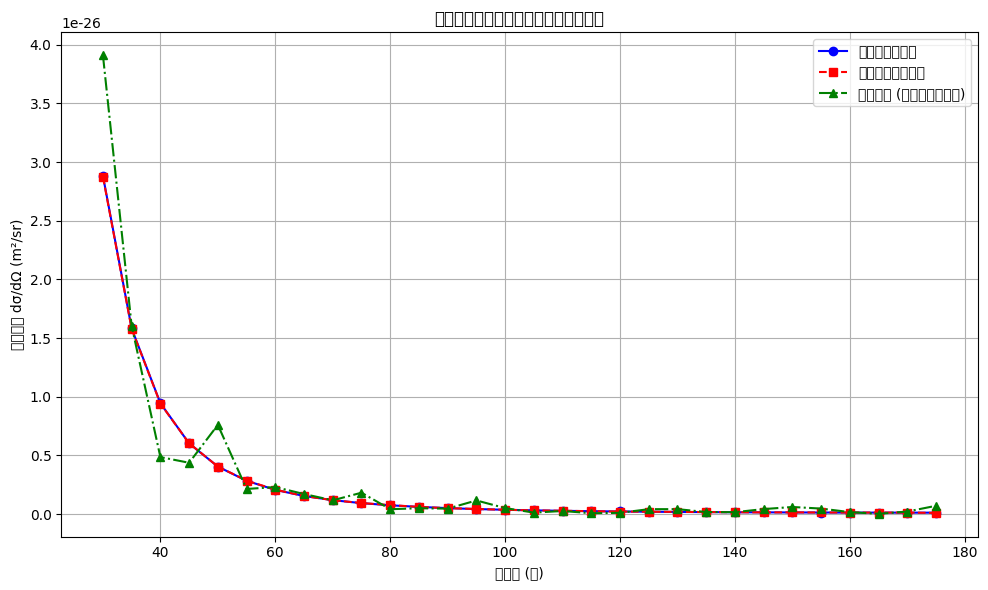

角度 (°)		蒙特卡洛模拟截面		分波展开截面		解析卢瑟福截面
 30°:	 2.875e-26 m²/sr,	3.910e-26 m²/sr,	2.883e-26m²/sr
 35°:	 1.578e-26 m²/sr,	1.604e-26 m²/sr,	1.582e-26m²/sr
 40°:	 9.425e-27 m²/sr,	4.864e-27 m²/sr,	9.455e-27m²/sr
 45°:	 6.041e-27 m²/sr,	4.381e-27 m²/sr,	6.033e-27m²/sr
 50°:	 4.057e-27 m²/sr,	7.607e-27 m²/sr,	4.056e-27m²/sr
 55°:	 2.864e-27 m²/sr,	2.150e-27 m²/sr,	2.846e-27m²/sr
 60°:	 2.089e-27 m²/sr,	2.308e-27 m²/sr,	2.070e-27m²/sr
 65°:	 1.548e-27 m²/sr,	1.717e-27 m²/sr,	1.552e-27m²/sr
 70°:	 1.193e-27 m²/sr,	1.182e-27 m²/sr,	1.195e-27m²/sr
 75°:	 9.489e-28 m²/sr,	1.830e-27 m²/sr,	9.421e-28m²/sr
 80°:	 7.777e-28 m²/sr,	4.241e-28 m²/sr,	7.579e-28m²/sr
 85°:	 6.164e-28 m²/sr,	5.059e-28 m²/sr,	6.211e-28m²/sr
 90°:	 5.162e-28 m²/sr,	4.729e-28 m²/sr,	5.175e-28m²/sr
 95°:	 4.415e-28 m²/sr,	1.170e-27 m²/sr,	4.379e-28m²/sr
100°:	 3.748e-28 m²/sr,	5.209e-28 m²/sr,	3.757e-28m²/sr
105°:	 3.243e-28 m²/sr,	1.344e-28 m²/sr,	3.266e-28m²/sr
110°:	 2.931e-28 m²/sr,	2.714e-28 m²/sr,	2.874e-28m²/sr
115°:	 2.545e-

In [170]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, eval_legendre

# -----------------------------
# 1. 参数设定
# -----------------------------
e = 1.602e-19         # 基本电荷 (C)
epsilon0 = 8.854e-12    # 真空介电常数 (F/m)
hbar = 1.0545718e-34    # 约化普朗克常数 (J·s)

# α粒子与金核参数
q = 2 * e             # α 粒子电荷 (2e)
Z = 79                # 金的原子序数
Q = Z * e             # 金核电荷

# 取α粒子质量近似为4u (1u = 1.660539e-27 kg)
u_mass = 1.660539e-27
mu = 4 * u_mass

# 入射能量：5.0 MeV 转换为焦耳 (1 MeV = 1.602e-13 J)
E_MeV = 5.0
E = E_MeV * 1.602e-13  # J

# 入射波数 k = sqrt(2μE)/ħ (单位: m^-1)
k = math.sqrt(2 * mu * E) / hbar

# 库仑参数 η = μ qQ / (4π ε₀ ħ² k)
eta = mu * q * Q / (4 * math.pi * epsilon0 * hbar**2 * k)

# 定义常数 C (用于散射角公式)，C = qQ/(8π ε₀ E)
C = q * Q / (8 * math.pi * epsilon0 * E)

# -----------------------------
# 2. 蒙特卡洛模拟计算
# -----------------------------
# 有效入射区域：假设有效入射影响参数 b 在 [0, b_max] 内，其中 b_max = 5 * C
b_max = 5 * C
A_eff = math.pi * b_max**2

# 模拟粒子数
N = 10**7
u_rand = np.random.uniform(0, 1, N)
# 根据概率密度 P(b)=2b/(b_max^2)生成 b
b = b_max * np.sqrt(u_rand)

# 散射角公式：theta = 2 * arctan(C/b)
theta = 2 * np.arctan(C / b)       # 单位：弧度
theta_deg = np.degrees(theta)        # 转换为角度

# 统计每个目标角度附近粒子数，用于计算模拟微分截面
# 这里选取目标角度（单位度）：从25°到175°，间隔10°
angles_deg = np.arange(30, 180, 5)
simulated_vals = []  # 存储模拟得到的微分截面 (m²/sr)
bin_width_deg = 1.0   # 每个角度区间宽度 (±0.5°)
bin_width_rad = math.radians(bin_width_deg)

# 入射流密度 J = N / A_eff (单位：粒子/m²)
J = N / A_eff

for theta0_deg in angles_deg:
    theta0_rad = math.radians(theta0_deg)
    indices = (theta_deg >= theta0_deg - bin_width_deg/2) & (theta_deg < theta0_deg + bin_width_deg/2)
    N_theta = np.sum(indices)
    # 固体角近似：dΩ ≈ 2π sinθ dθ
    dOmega = 2 * math.pi * math.sin(theta0_rad) * bin_width_rad
    # 统计该角区间内的粒子数对应的dN/dΩ
    dN_dOmega = N_theta / dOmega
    # 模拟微分截面 = (dN/dΩ) / J
    dsigma_sim = dN_dOmega / J
    simulated_vals.append(dsigma_sim)
simulated_vals = np.array(simulated_vals)

# -----------------------------
# 3. 利用分波展开（径向薛定谔数值求解得到的相移）计算微分截面
# -----------------------------
def sigma(l, eta):
    """计算库仑相移 sigma_l = arg(Γ(l+1+iη))"""
    return np.angle(gamma(l + 1 + 1j * eta))

def scattering_amplitude(theta, k, eta, l_max=150):
    """
    利用分波展开计算散射振幅 f(θ)：
    f(θ)=1/(2ik) Σ_{l=0}^{l_max} (2l+1)[S_l - 1] P_l(cosθ)
    其中 S_l = exp(2i σ_l)
    """
    f = 0+0j
    for l in range(l_max+1):
        sig = sigma(l, eta)
        S_l = np.exp(2j * sig)
        P_l = eval_legendre(l, math.cos(theta))
        f += (2 * l + 1) * (S_l - 1) * P_l
    f = f / (2j * k)
    return f

# 对于纯库仑散射，由于势能无短程部分，S_l = exp(2iσ_l)；取 l_max 足够大使求和收敛
angles_deg_pw = np.arange(30, 180, 5)
dsigma_pw = []  # 存储通过分波展开得到的微分截面
for theta0_deg in angles_deg_pw:
    theta_rad = math.radians(theta0_deg)
    f_theta = scattering_amplitude(theta_rad, k, eta, l_max=150)
    dsigma = abs(f_theta)**2
    dsigma_pw.append(dsigma)
dsigma_pw = np.array(dsigma_pw)

# -----------------------------
# 4. 解析卢瑟福散射截面
# -----------------------------
theory_vals = []  # 解析卢瑟福公式得到的微分截面
for theta0_deg in angles_deg:
    theta_rad = math.radians(theta0_deg)
    factor = (q * Q / (16 * math.pi * epsilon0 * E))
    dsigma = (factor**2) / (math.sin(theta_rad/2)**4)
    theory_vals.append(dsigma)
theory_vals = np.array(theory_vals)

# -----------------------------
# 5. 绘图：将蒙特卡洛模拟、分波展开与解析结果一起画出
# -----------------------------
plt.clf()
plt.figure(figsize=(10, 6))
plt.plot(angles_deg, theory_vals, 'b-o', label='解析卢瑟福截面')
plt.plot(angles_deg, simulated_vals, 'r-s', label='蒙特卡洛模拟截面',linestyle='--')
plt.plot(angles_deg_pw, dsigma_pw, 'g-^', label='分波展开 (径向薛定谔求解)',linestyle='-.')
plt.xlabel("散射角 (度)")
plt.ylabel("微分截面 dσ/dΩ (m²/sr)")
plt.title("卢瑟福散射：三种方法的微分截面对比")
plt.legend()
plt.grid(True)
plt.tight_layout()
# 保存图像
plt.savefig('./output/alpha_particles_simulation_all.png')
plt.show()



# 打印每个角度的结果
print("角度 (°)\t\t蒙特卡洛模拟截面\t\t分波展开截面\t\t解析卢瑟福截面")
for i in range(len(angles_deg)):
    print(f"{angles_deg[i]:3d}°:\t {simulated_vals[i]:.3e} m²/sr,\t{dsigma_pw[i]:.3e} m²/sr,\t{theory_vals[i]:.3e}m²/sr")


In [171]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # 引入进度条库

# -----------------------------
# 1. 物理参数设定
# -----------------------------
e = 1.602e-19        
epsilon0 = 8.854e-12  
hbar = 1.0545718e-34  

Z = 79                
q = 2 * e             
Q = Z * e             
u_mass = 1.660539e-27 
mu = 4 * u_mass       

E_MeV = 5.0
E = E_MeV * 1.602e-13 

C = q * Q / (8 * np.pi * epsilon0 * E)

# -----------------------------
# 2. Verlet 积分法模拟粒子运动（带进度条）
# -----------------------------
def verlet_integration(N, dt, max_steps=1000):
    """ 使用Verlet积分法模拟粒子散射，并统计散射角 """
    positions = np.zeros((N, 2))  
    velocities = np.zeros((N, 2))  
    
    velocities[:, 0] = np.sqrt(2 * E / mu)  

    angles = []  

    with tqdm(total=N, desc="模拟进度", unit="粒子") as pbar:
        for i in range(N):
            position = positions[i]
            velocity = velocities[i]

            for _ in range(max_steps):
                r = np.linalg.norm(position)
                if r < 1e-15:  
                    continue
                
                force = (q * Q) / (4 * np.pi * epsilon0 * r**2)
                direction = -position / r  
                force_vector = force * direction
                
                new_position = position + velocity * dt + 0.5 * force_vector / mu * dt**2
                new_velocity = velocity + 0.5 * force_vector / mu * dt
                
                position = new_position
                velocity = new_velocity

                if np.linalg.norm(position) > 5 * C:
                    theta = np.arctan2(position[1], position[0])  
                    angles.append(np.abs(np.degrees(theta)))  
                    break

            pbar.update(1)  # 更新进度条

    return np.array(angles)

# -----------------------------
# 3. 统计模拟结果
# -----------------------------
N = 10**5  
dt = 1e-16  

angles_deg = verlet_integration(N, dt)

angles_bins = np.arange(30, 180, 5)  
hist, _ = np.histogram(angles_deg, bins=angles_bins, density=True)  

# -----------------------------
# 4. 计算理论微分散射截面
# -----------------------------
def theory_dsigma(theta_deg, C):
    theta_rad = np.radians(theta_deg)
    return (C**2) / (4 * np.sin(theta_rad / 2)**4)

theory_vals = [theory_dsigma(theta, C) for theta in angles_bins[:-1]]

theory_vals = np.array(theory_vals)
theory_vals /= np.sum(theory_vals)


模拟进度: 100%|██████████| 100000/100000 [03:06<00:00, 536.34粒子/s]


In [172]:
hist_vals

array([128899, 106441,  88256,  74179,  63472,  53928,  46905,  40569,
        35225,  31140,  27273,  24688,  21872,  19715,  17696,  15915,
        14145,  13010,  11967,  10910,   9960,   9242,   8392,   7804,
         7162,   6792,   6148,   5678,   5370,   4920,   4688,   4284,
         4061,   3787,   3607,   3431,   3268,   2956,   2842,   2638,
         2532,   2328,   2186,   2114,   1971,   1783,   1890,   1724,
         1658,   1570,   1414,   1465,   1285,   1234,   1224,   1177,
         1105,   1097,    956,    964,    910,    851,    808,    797,
          738,    694,    638,    642,    638,    612,    517,    569,
          508,    487,    475,    411,    431,    403,    361,    359,
          330,    292,    310,    263,    214,    231,    214,    223,
          176,    160,    157,    141,    116,    112,     87,     69,
           61,     42,     26,     15])

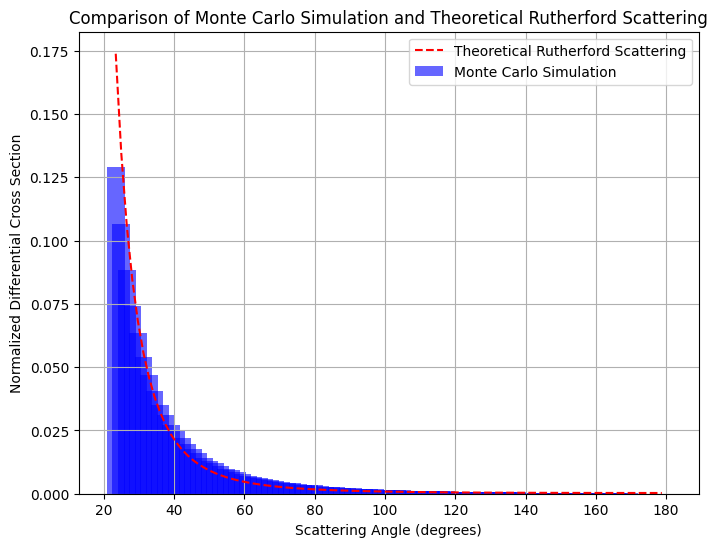

In [173]:
theory_angles = bin_centers  # 确保和直方图匹配
theory_vals = np.array([theory_dsigma(theta, C) for theta in theory_angles])
theory_vals /= np.sum(theory_vals)  # 归一化
gui_hist = hist_vals/hist_vals.sum()
# -----------------------------
# 5. 绘图
# -----------------------------
fig = plt.figure(figsize=(8, 6))

plt.bar(theory_angles, gui_hist, width=(angles_bins[1] - angles_bins[0]), alpha=0.6, label='Monte Carlo Simulation', color='b')
plt.plot(theory_angles, theory_vals, label='Theoretical Rutherford Scattering', color='r', linestyle='--')

plt.legend()
plt.title('Comparison of Monte Carlo Simulation and Theoretical Rutherford Scattering')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Normalized Differential Cross Section')
plt.grid(True)

plt.show()
# save fig
fig.savefig('output/alpha_particles_simulation.png')

In [174]:
gui_hist.sum()

np.float64(0.9999999999999998)